## Creating synthetic ordinal data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jmspack.NLTSA import flatten

In [2]:
# column_amount = 10
# answer_options = [1, 2, 3, 4, 5]
# row_amount = 50
# answer_probabilities = [0.4, 0.1, 0.1, 0.1, 0.3] 

# df = pd.DataFrame()
# for column_num in range(0, column_amount):
#     np.random.seed(69420 + column_num) 
#     uniform_array = np.random.choice(  
#          a=answer_options,  
#          size=row_amount,  
#          p=answer_probabilities  
#     )
#     current_df = pd.DataFrame({f"likert_{len(answer_options)}_options_{column_num}":uniform_array})
#     df = pd.concat([df, current_df], axis=1)

In [3]:
def ordinal_data_creation(column_amount,
                          answer_options,
                          row_amount,
                          answer_probabilities):    
        
    df = pd.DataFrame()
    for column_num in range(0, column_amount):
        np.random.seed(69420 + column_num) 
        
        if answer_probabilities is None:
            uniform_array = np.random.choice(  
                 a=answer_options,  
                 size=row_amount,  
                 p=flatten(np.random.dirichlet(np.ones(len(answer_options)),size=1).tolist())  
            )
            
            print({f"likert_{len(answer_options)}_options_{column_num}": flatten(np.random.dirichlet(np.ones(len(answer_options)),size=1).tolist())})
            
        else:
            uniform_array = np.random.choice(  
                 a=answer_options,  
                 size=row_amount,  
                 p=answer_probabilities  
            )
            print({f"likert_{len(answer_options)}_options_{column_num}": answer_probabilities})
        
        
        current_df = pd.DataFrame({f"likert_{len(answer_options)}_options_{column_num}":uniform_array})
        df = pd.concat([df, current_df], axis=1)
    return df

In [4]:
row_amount = 2000

df_1 = ordinal_data_creation(column_amount = 30,
                        answer_options = [1, 2, 3, 4, 5],
                        row_amount = row_amount,
                        answer_probabilities = None)

df_2 = ordinal_data_creation(column_amount = 10,
                        answer_options = [1, 2, 3, 4, 5],
                        row_amount = row_amount,
                        answer_probabilities = [0.4, 0.1, 0.1, 0.1, 0.3])
df_2.columns = [x[:-1] + str(int(x[-1]) + 30) for x in df_2.columns.tolist()]

df_3 = ordinal_data_creation(column_amount = 10,
                        answer_options = [1, 2, 3, 4, 5, 6, 7],
                        row_amount = row_amount,
                        answer_probabilities = None)

df_4 = ordinal_data_creation(column_amount = 10,
                        answer_options = [0, 1],
                        row_amount = row_amount,
                        answer_probabilities = [0.9, 0.1])

bool_df = ordinal_data_creation(column_amount = 1,
                        answer_options = [0, 1],
                        row_amount = row_amount,
                        answer_probabilities = [0.6, 0.4])
bool_df.columns = ["target"]

df = pd.concat([df_1, df_2, df_3, df_4, bool_df], axis=1)


{'likert_5_options_0': [0.3260497316019787, 0.17021080937036878, 0.20238572809340846, 0.1398947366106401, 0.161458994323604]}
{'likert_5_options_1': [0.08777919292218628, 0.11191711990196725, 0.18016252873285118, 0.16844854627309122, 0.451692612169904]}
{'likert_5_options_2': [0.49617221548341156, 0.18379184363308368, 0.08760265629706548, 0.13114380297375605, 0.10128948161268306]}
{'likert_5_options_3': [0.15041858482432638, 0.029361316457183314, 0.08469127721920586, 0.250929064299109, 0.4845997572001755]}
{'likert_5_options_4': [0.36942123568391816, 0.1309521144166391, 0.2848324249275291, 0.0655132232116965, 0.14928100176021722]}
{'likert_5_options_5': [0.1380782844001991, 0.2292352905787918, 0.1981735388766408, 0.06811444737903176, 0.3663984387653367]}
{'likert_5_options_6': [0.012044480134060658, 0.35340651273441764, 0.19850441118878964, 0.1932497693009291, 0.242794826641803]}
{'likert_5_options_7': [0.13228973044665338, 0.017301326305110536, 0.1351938215960546, 0.15865722964735782,

In [5]:
df.head()

,likert_5_options_0,likert_5_options_1,likert_5_options_2,likert_5_options_3,likert_5_options_4,likert_5_options_5,likert_5_options_6,likert_5_options_7,likert_5_options_8,likert_5_options_9,...,likert_2_options_1,likert_2_options_2,likert_2_options_3,likert_2_options_4,likert_2_options_5,likert_2_options_6,likert_2_options_7,likert_2_options_8,likert_2_options_9,target
0,1,4,2,1,2,3,3,5,5,3,...,0,0,0,0,0,0,0,0,0,0
1,3,1,2,5,1,4,4,5,1,2,...,0,1,0,1,0,0,0,0,0,0
2,2,3,3,1,1,3,3,5,4,4,...,0,0,0,0,1,0,0,0,0,0
3,5,2,2,5,2,1,3,2,5,3,...,0,0,0,0,0,0,0,0,0,0
4,3,4,2,5,2,4,3,5,4,1,...,0,0,1,1,0,0,0,1,0,0


## Shuffle the target so there are no variables which have a perfect classification

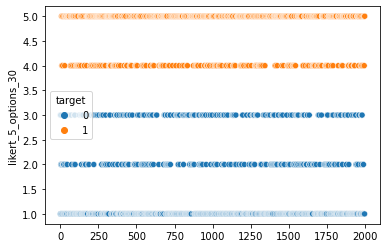

In [6]:
_ = sns.scatterplot(x=df.index, y=df["likert_5_options_30"], hue=df["target"])

In [7]:
df.loc[0:int(row_amount/2), "target"] = df.loc[0:int(row_amount/2), "target"].sample(frac=1, random_state=69420).reset_index(drop=True)

In [8]:
df = df.sample(frac=1, random_state=69420).reset_index(drop=True)

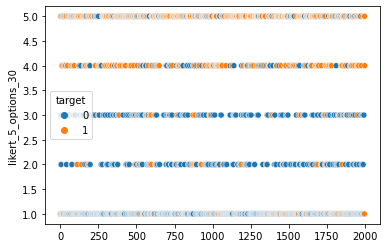

In [9]:
_ = sns.scatterplot(x=df.index, y=df["likert_5_options_30"], hue=df["target"])

In [10]:
df.head()

,likert_5_options_0,likert_5_options_1,likert_5_options_2,likert_5_options_3,likert_5_options_4,likert_5_options_5,likert_5_options_6,likert_5_options_7,likert_5_options_8,likert_5_options_9,...,likert_2_options_1,likert_2_options_2,likert_2_options_3,likert_2_options_4,likert_2_options_5,likert_2_options_6,likert_2_options_7,likert_2_options_8,likert_2_options_9,target
0,5,1,2,5,5,3,3,5,5,2,...,1,0,0,0,0,0,0,0,0,0
1,1,5,5,1,5,3,3,5,5,2,...,1,0,0,0,0,0,0,0,0,0
2,5,4,2,5,2,4,3,5,1,3,...,0,0,0,0,0,0,0,0,0,1
3,5,4,3,5,5,3,5,4,1,2,...,0,0,0,0,0,0,1,0,0,0
4,5,5,3,5,2,3,3,5,1,3,...,0,0,0,1,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   likert_5_options_0   2000 non-null   int64
 1   likert_5_options_1   2000 non-null   int64
 2   likert_5_options_2   2000 non-null   int64
 3   likert_5_options_3   2000 non-null   int64
 4   likert_5_options_4   2000 non-null   int64
 5   likert_5_options_5   2000 non-null   int64
 6   likert_5_options_6   2000 non-null   int64
 7   likert_5_options_7   2000 non-null   int64
 8   likert_5_options_8   2000 non-null   int64
 9   likert_5_options_9   2000 non-null   int64
 10  likert_5_options_10  2000 non-null   int64
 11  likert_5_options_11  2000 non-null   int64
 12  likert_5_options_12  2000 non-null   int64
 13  likert_5_options_13  2000 non-null   int64
 14  likert_5_options_14  2000 non-null   int64
 15  likert_5_options_15  2000 non-null   int64
 16  likert_5_options_16  200

In [12]:
features_list = df.drop("target", axis=1).columns.tolist()

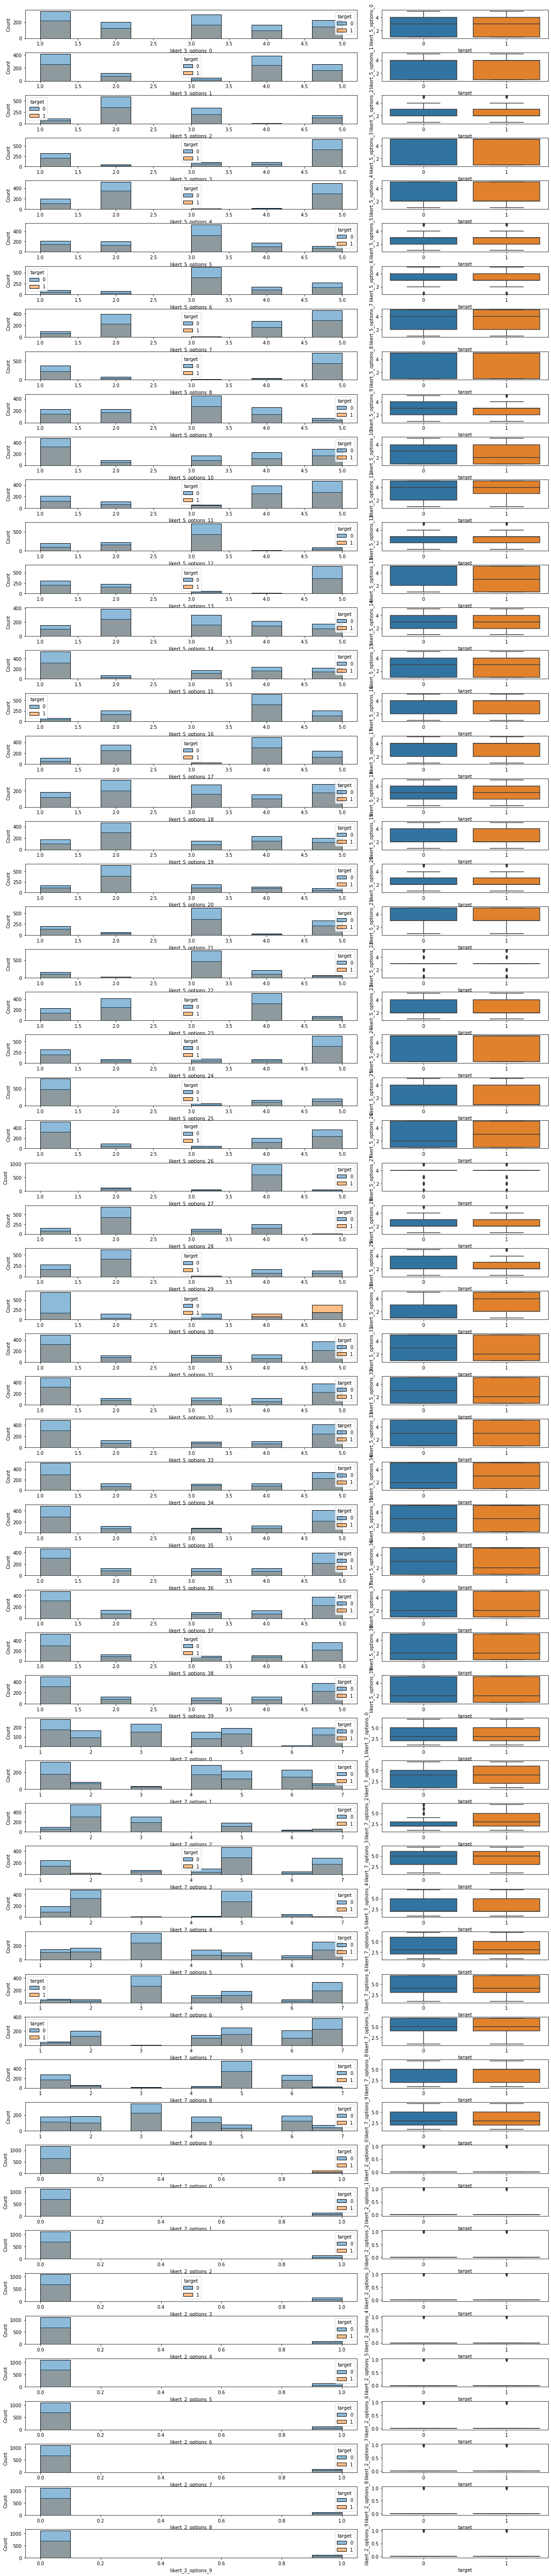

In [13]:
fig, axs = plt.subplots(figsize=(20,100), nrows=len(features_list), ncols=2, gridspec_kw={'width_ratios': [2, 1]})
fig.subplots_adjust(hspace = 0.5, wspace=0.1)
axs = axs.ravel()
for i in range(0, len(features_list)*2, 2):
    _ = sns.histplot(data=df, x=features_list[int(i/2)], hue="target", kde=False, bins=10, ax=axs[i])
    _ = sns.boxplot(data=df, x="target", y=features_list[int(i/2)], ax=axs[i+1])

In [14]:
_ = df.to_csv("data/synthetic_likert_data.csv")